# Students Performance in Exams

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the csv file into a pandas dataframe
df =pd.read_csv('Downloads/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# look for missing values
df.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [4]:
# Rename column labels
df.columns = ['gender','race','parent_education','lunch_type','test_completed','math_score','reading_score','writing_score']

In [5]:
# Create a new column average_score
df['average_score'] = (df['reading_score'] + df['math_score'] + df['writing_score'])/3

# convert average_score to categorical variable # Poor:0~40 Average:40~60 Good:60~80 Excellent:80~100
df['grade'] = 'na'
df.loc[(df.average_score >= 80) & (df.average_score <= 100), 'grade'] = 'excellent' 
df.loc[(df.average_score >= 60) & (df.average_score < 80), 'grade'] = 'good' 
df.loc[(df.average_score >= 40) & (df.average_score < 60), 'grade'] = 'average'
df.loc[(df.average_score >= 0) & (df.average_score < 40), 'grade'] = 'poor'
df.head()

,gender,race,parent_education,lunch_type,test_completed,math_score,reading_score,writing_score,average_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,good
1,female,group C,some college,standard,completed,69,90,88,82.333333,excellent
2,female,group B,master's degree,standard,none,90,95,93,92.666667,excellent
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,average
4,male,group C,some college,standard,none,76,78,75,76.333333,good


Text(0, 0.5, 'Number of Student')

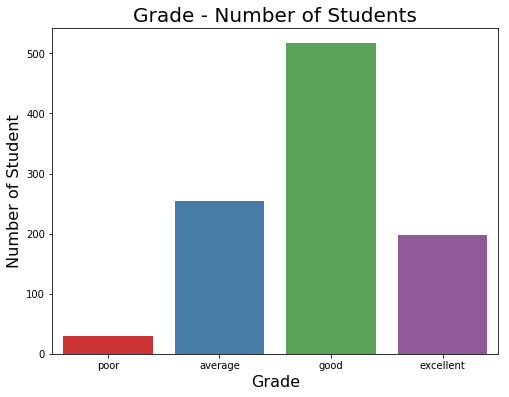

In [6]:
# Number of Students in each Grade category
plt.figure(figsize=(8,6))
sns.countplot(df.grade, order=["poor","average","good","excellent"], palette='Set1')
plt.title('Grade - Number of Students',fontsize=20)
plt.xlabel('Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

* Majority of Students have scored "good" grade.

Text(0, 0.5, 'Number of Student')

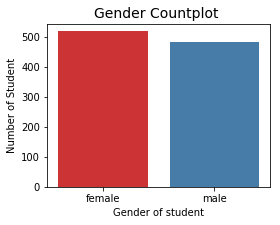

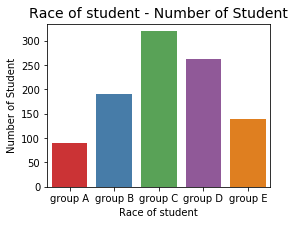

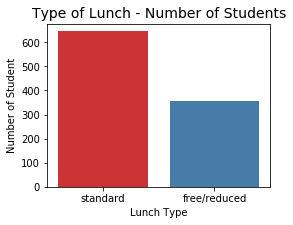

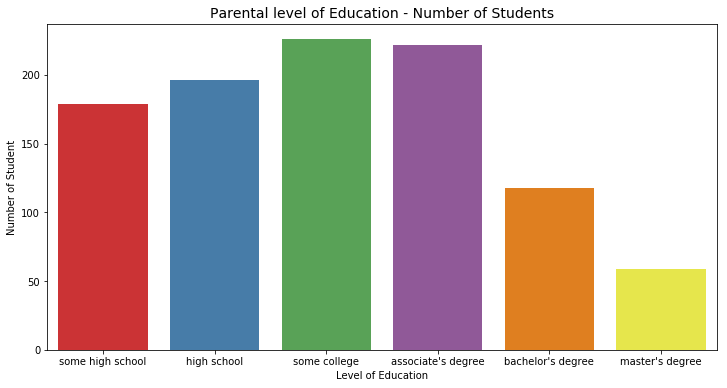

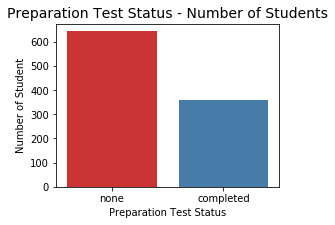

In [7]:
# Gender Countplot
plt.figure(figsize=(4,3))
sns.countplot(df.gender, palette='Set1')
plt.title('Gender Countplot ',fontsize=14)
plt.xlabel('Gender of student', fontsize=10)
plt.ylabel('Number of Student', fontsize=10)

# Race/Ethnicity Countplot
plt.figure(figsize=(4,3))
sns.countplot(df.race, order = ["group A","group B","group C","group D","group E"], palette='Set1')
plt.title('Race of student - Number of Student',fontsize=14)
plt.xlabel('Race of student', fontsize=10)
plt.ylabel('Number of Student', fontsize=10)

# Lunch Countplot
plt.figure(figsize=(4,3))
sns.countplot(df.lunch_type, palette='Set1')
plt.title('Type of Lunch - Number of Students',fontsize=14)
plt.xlabel('Lunch Type', fontsize=10)
plt.ylabel('Number of Student', fontsize=10)

# Parental_level_of_Education Countplot
plt.figure(figsize=(12,6))
sns.countplot(df.parent_education,
              order = ["some high school","high school","some college","associate's degree"
                       ,"bachelor's degree","master's degree"], palette='Set1')
plt.title('Parental level of Education - Number of Students',fontsize=14)
plt.xlabel('Level of Education', fontsize=10)
plt.ylabel('Number of Student', fontsize=10)

# Preparation_Test_Status Countplot
plt.figure(figsize=(4,3))
sns.countplot(df.test_completed, palette='Set1')
plt.title('Preparation Test Status - Number of Students',fontsize=14)
plt.xlabel('Preparation Test Status', fontsize=10)
plt.ylabel('Number of Student', fontsize=10)

* Number of Female students are slightly more than Male students.
* Majority of students belong to group C and group A has least number of students.
* Almost 66% of students take Standard Lunch.
* Most of the parents have low level of education and only few parents have bachelor's and master's degree.
* Only about 33% of students complete the Preparation test. 

D:\Users\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


Text(0.5, 0, 'Grade')

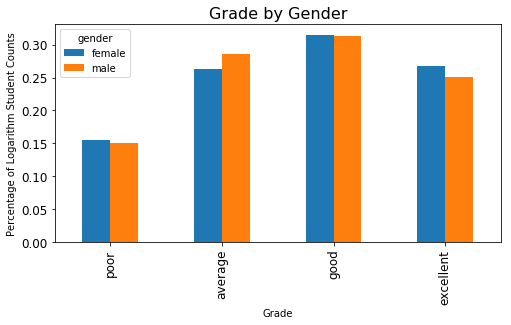

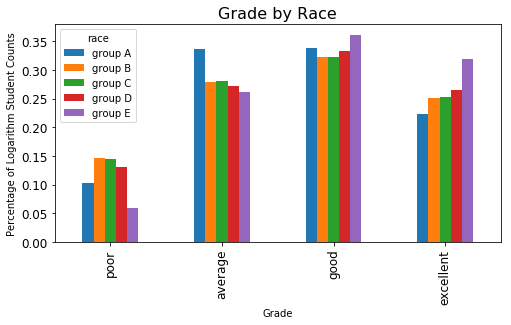

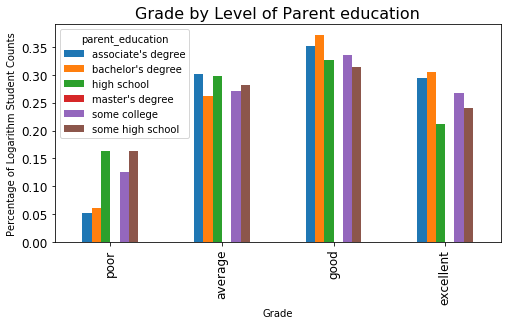

In [8]:
# Percentage of Students in differnt Grade category
perc = (lambda col: col/col.sum())
index = ['poor','average','good','excellent']

#Grade by Gender
gen_tab1 = pd.crosstab(index=df.grade, columns=df.gender)
gen_tab = np.log(gen_tab1)
gen_perc = gen_tab.apply(perc).reindex(index)
gen_perc.plot.bar( figsize=(8,4), fontsize=12)
plt.title('Grade by Gender', fontsize=16)
plt.ylabel('Percentage of Logarithm Student Counts', fontsize=10)
plt.xlabel('Grade', fontsize=10)

#Grade by Race
race_tab1 = pd.crosstab(index=df.grade, columns=df.race)
race_tab = np.log(race_tab1)
race_perc = race_tab.apply(perc).reindex(index)
race_perc.plot.bar(figsize=(8,4), fontsize=12)
plt.title('Grade by Race', fontsize=16)
plt.ylabel('Percentage of Logarithm Student Counts', fontsize=10)
plt.xlabel('Grade', fontsize=10)

# Grade by Level of Parent education
pe_tab1 = pd.crosstab(index=df.grade, columns=df.parent_education)
pe_tab = np.log(pe_tab1)
pe_perc = pe_tab.apply(perc).reindex(index)
pe_perc.plot.bar(figsize=(8,4), fontsize=12)
plt.title('Grade by Level of Parent education', fontsize=16)
plt.ylabel('Percentage of Logarithm Student Counts', fontsize=10)
plt.xlabel('Grade', fontsize=10)


* Female students performed better than the Male students in the exam.
* The best performing students belong to group E.
* Children of Parents with higher degree performed better in the exam.

Text(0.5, 0, 'Grade')

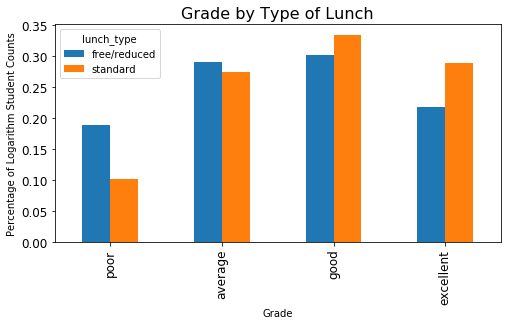

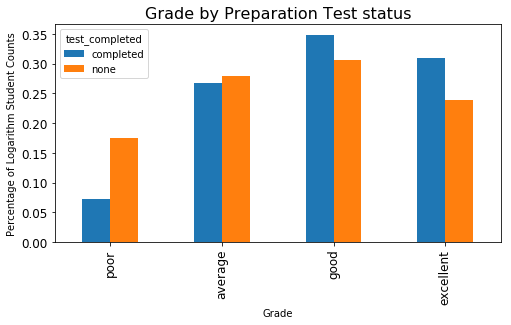

In [9]:
# Grade by Type of Lunch
lch_tab1 = pd.crosstab(index=df.grade, columns=df.lunch_type)
lch_tab = np.log(lch_tab1)
lch_perc = lch_tab.apply(perc).reindex(index)
lch_perc.plot.bar(figsize=(8,4), fontsize=12)
plt.title('Grade by Type of Lunch', fontsize=16)
plt.ylabel('Percentage of Logarithm Student Counts', fontsize=10)
plt.xlabel('Grade', fontsize=10)

# Grade by Preparation Test status
tst_tab1 = pd.crosstab(index=df.grade, columns=df.test_completed)
tst_tab = np.log(tst_tab1)
tst_perc = tst_tab.apply(perc).reindex(index)
tst_perc.plot.bar(figsize=(8,4), fontsize=12)
plt.title('Grade by Preparation Test status', fontsize=16)
plt.ylabel('Percentage of Logarithm Student Counts', fontsize=10)
plt.xlabel('Grade', fontsize=10)

* Students who took standard lunch performed better in the exam.
* Students who completed the preparation test performed better in the exam.

C:\Users\KC\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


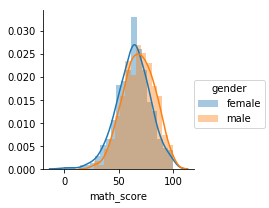

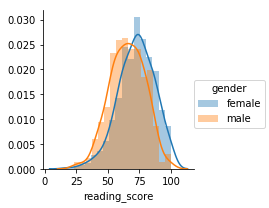

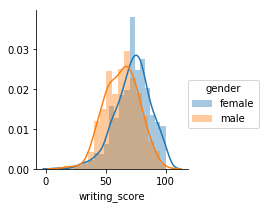

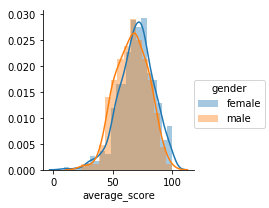

In [10]:
# Gender vs Math score
sns.FacetGrid(df, hue="gender",size=3).map(sns.distplot,"math_score").add_legend()
plt.show()
# Gender vs Reading score
sns.FacetGrid(df, hue="gender",size=3).map(sns.distplot,"reading_score").add_legend()
plt.show()
# Gender vs Writing score
sns.FacetGrid(df, hue="gender",size=3).map(sns.distplot,"writing_score").add_legend()
plt.show()
# Gender vs Average score
sns.FacetGrid(df, hue="gender",size=3).map(sns.distplot,"average_score").add_legend()
plt.show()

* Male students have better Math scores than female students.
* Female students have better scores in Reading and Writing.
* Female students have slightly better average score than male students.

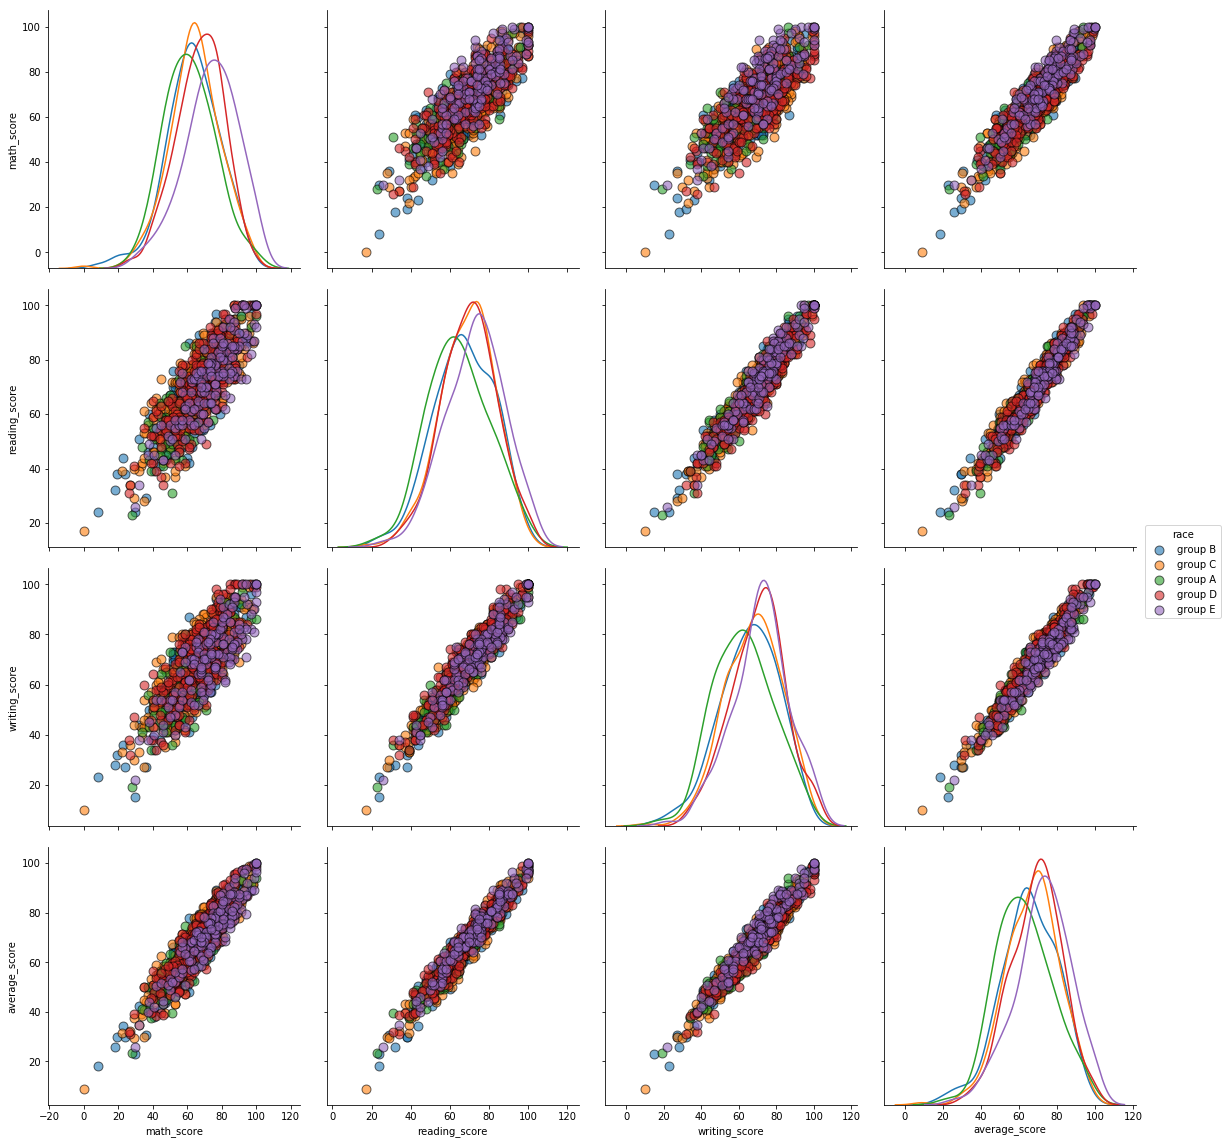

In [11]:
# Race vs Math_score, Reading_score, Writing_score, Average_score
sns.pairplot(df,hue = 'race', diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4);

* Most of the top scorers in maths belong to group E.
* Students from group C, D and E have scored better in Reading than other groups.
* Students from group D and E have performed better than other groups in Writing.
* Students from group A are the worst performers in all subjects.
* Group C, D and E students have best average score.

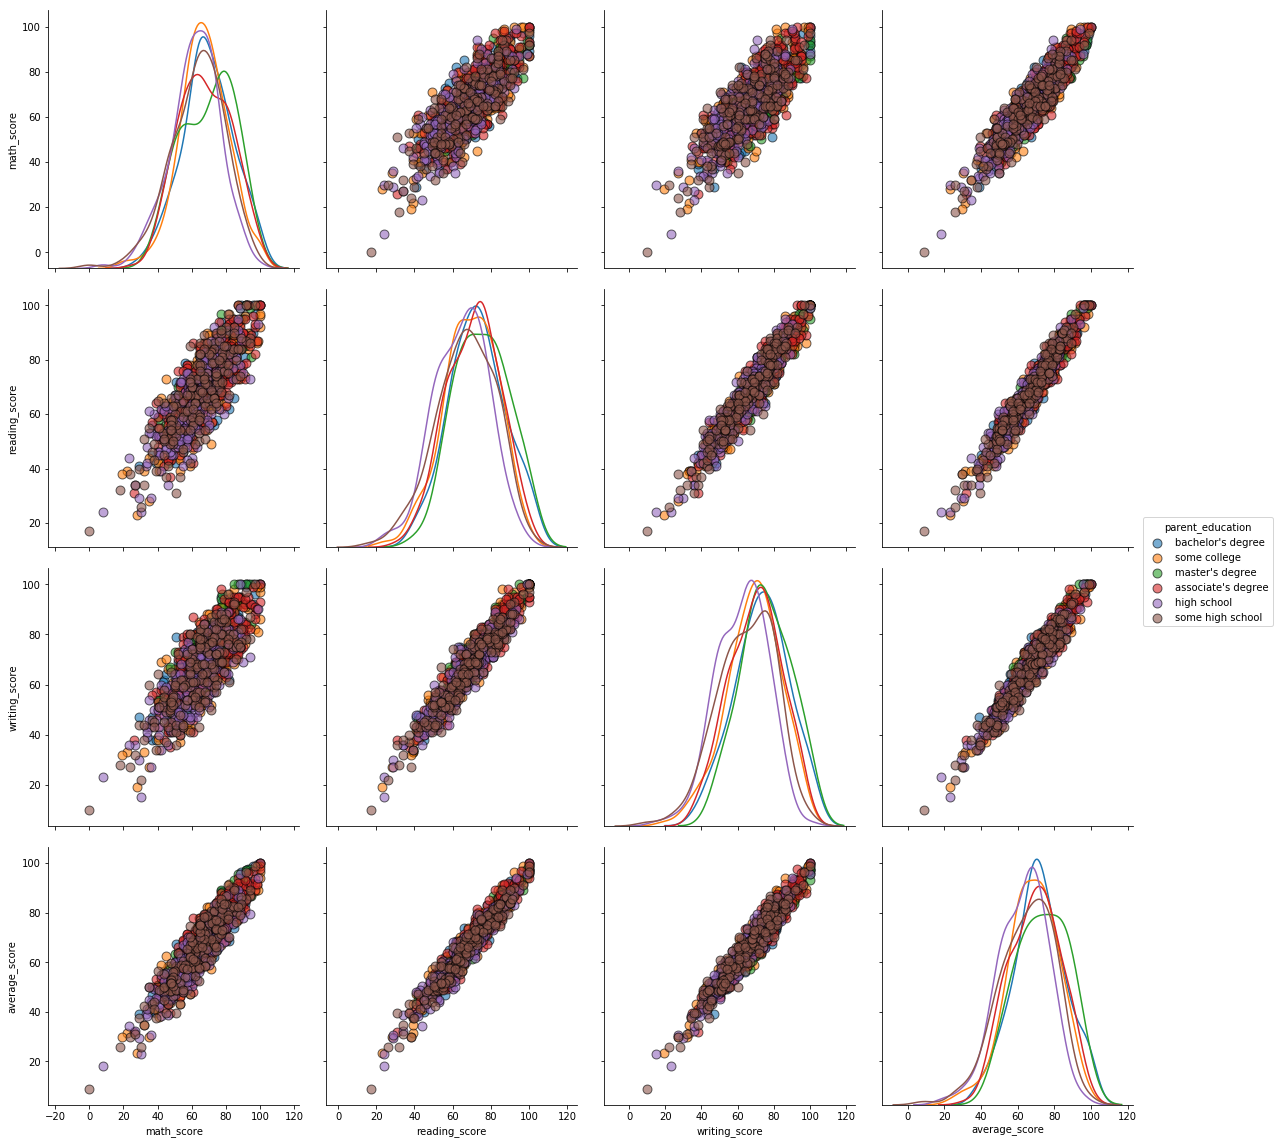

In [12]:
# Race vs Math_score, Reading_score, Writing_score, Average_score
sns.pairplot(df,hue = 'parent_education', diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4);

* Students whose Parents have Master's degree and Bachelor's degree have performed better than others in the exam.
* Students whose Parents have High school degree have scored relatively less marks compared to others in all subjects.

C:\Users\KC\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


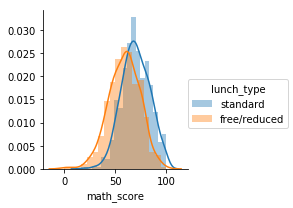

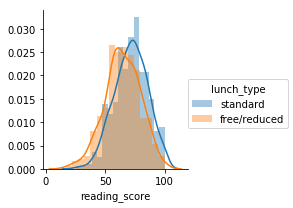

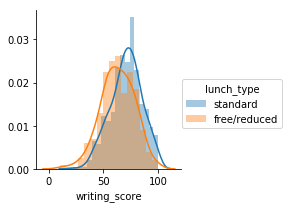

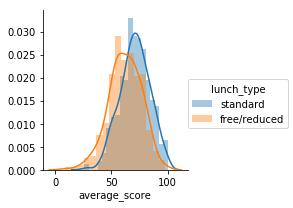

In [13]:
# Lunch type vs Math_score
sns.FacetGrid(df, hue="lunch_type",size=3).map(sns.distplot,"math_score").add_legend()
plt.show()
# Lunch type vs Reading_score
sns.FacetGrid(df, hue="lunch_type",size=3).map(sns.distplot,"reading_score").add_legend()
plt.show()
# Lunch type vs Writing_score
sns.FacetGrid(df, hue="lunch_type",size=3).map(sns.distplot,"writing_score").add_legend()
plt.show()
# Lunch type vs Average_score
sns.FacetGrid(df, hue="lunch_type",size=3).map(sns.distplot,"average_score").add_legend()
plt.show()

* Students who took standard Lunch performed better in all the subjects.

C:\Users\KC\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


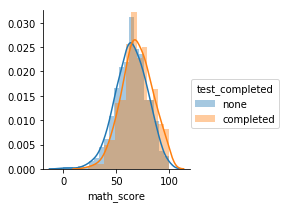

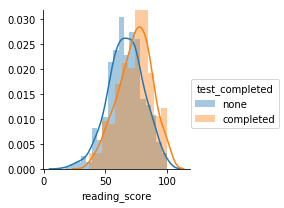

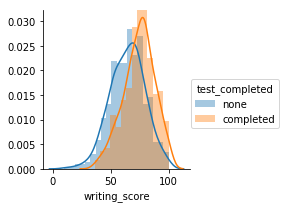

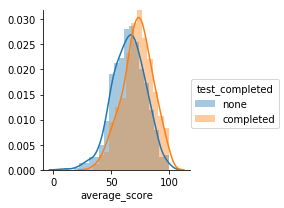

In [14]:
# Preparation Test status  vs Math_score
sns.FacetGrid(df, hue="test_completed",size=3).map(sns.distplot,"math_score").add_legend()
plt.show()
# Preparation Test status  vs Reading_score
sns.FacetGrid(df, hue="test_completed",size=3).map(sns.distplot,"reading_score").add_legend()
plt.show()
# Preparation Test status  vs Writing_score
sns.FacetGrid(df, hue="test_completed",size=3).map(sns.distplot,"writing_score").add_legend()
plt.show()
# Preparation Test status  vs Average_score
sns.FacetGrid(df, hue="test_completed",size=3).map(sns.distplot,"average_score").add_legend()
plt.show()

* Students who completed the preparation test performed better in the exam.

# Conclusion
* Female students performed better than Male students

* Students from group E are best performers and Students from group A are worst performers i.e. Performance of a student depends on his/her race.

* Parents education level has positive impact on Students performance in the exam.

* Peformance of students also depends on the type of lunch they take i.e. standard lunch helps in better performance.

* Preparation Test plays a significant role in students performance i.e. Completion of Preparation test helps in getting better scores in all subject.